# Volatility models

last time we concluded the lesson with a discussion of volatility well this time we're going to learn about that in more detail when making long-term huge purchases investors often seek stability that's why as long as a portfolio rarely experiences big shocks they're willing to consider it and here comes the need for special models that measure volatility. 

For starters when we talk about volatility we're talking about the magnitude of the residuals we don't care if they're positive or negative we just care how off our predictions are, hence a positive shock or a negative one is equally unpleasant since we're seeking stability. That explains why volatility is synonymous with variance and why we want to avoid it. Lower variance signals stability which in turn suggests lower risk thus measuring volatility is key when we want safety in our investments. But how do we disregard the difference between positive and negative signs in our analysis?  

By transforming the data our approach is simple yet effective we square the values not only does this solve the positive negative conundrum but it also penalizes high differences between true values and predictions more.  This properly increases the importance of big unpredicted shocks and allows us to measure the conditional heteroskedasticity of the data by taking into account past values. These models are called autoregressive conditional heteroskedasticity or ARCH models.

Welcome back last time we talked about measuring volatility and mentioned the  arch model as the most common approach to doing that. in this tutorial we're  going to introduce the notation behind the model what its parts represent when we use it and how to interpret all of this right off the bat we need to make  one thing perfectly clear unlike the ARIMA family of models the arch ones consists of several equations, including one for the mean and another for the variance. 
Some of you might be wondering wait why do we need several equations, well the explanation is rather simple. To measure unexpected shocks we need some sort of norm which we set with the first equation. Without such a base model we don't really have anything to deviate from. Perfect, now let's discuss the  name of the model. As you already might  suspect just like AR MA and arma arch is  also an abbreviation it stands for **autoregressive conditional heteroscedasticity model** to fully understand how it works and what it  measures will break this notion down  into several parts.

First off let's look at **heteroscedasticity**, it comes from  ancient Greek its literal meaning is something along the lines of different dispersion as you're aware the most  commonly used measurements of dispersion are variance and standard deviation and 
since we have a direct relationship between the two we are only going to focus on the former. Next up is **conditional** in Bayesian inference a conditional value is one that depends on  others the simplest example of this is conditional probability where the likelihood of one outcome varies when conditioned to other outcomes.

Alright **the combination between conditional and heteroscedasticity suggests we will be dealing with variance which is dependent on values but what might these values be?  Well here in comes the autoregressive part we'll be using past values to measure variance which is conditional of the variance of past periods** 
I know it's challenging to imagine all this so let's take a look at the variance equation for a simple arch one model. Okay suppose we have a variable Y and we want to apply the simple arch model on it, then the equation will read as follows: 

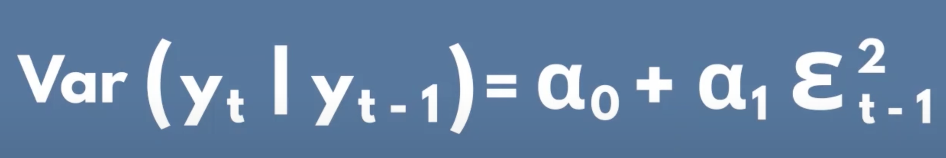

Okay now let's dismantle this model and go over its different parts. 
- We start with the conditional variance where we see that the current period values are dependent on past ones, in particular since this is a simple arch model we're only relying on values from a single lag ago, that's why we only have Y in period t minus 1 on the right side of the conditional line. 
- Next we have the term alpha null which is a constant factor similar to C from models we've examined so far. 
- After that we can see alpha 1 which is the coefficient associated with the first term moreover it's equivalent to the theta one we used in the ARMA and ARIMA models 
- the last term is the one we're most interested in it's the  squared value of the residual epsilon for the previous period. Here we see the auto regressive aspect of the model, since we are relying on past values to determine its conditional variance. As  you know from statistics we use Sigma squared to express variance  therefore we substitute the dependent variable notation with Sigma squared t which of course expresses the variance in period t hence we write:  
    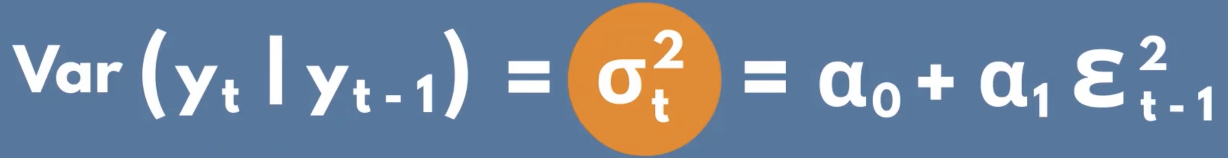 
This way we lose the clearly defined conditional aspect of the model, however we can easily determine its order and do so by counting the number of past residuals we're incorporating which is 1 in this case. 

Great, let's quickly discuss higher order arch models before we move on to the more complex topics. For starters the arch contains a single order specification Q just like the auto regressive model it expresses the number of previous values we include in the model hence an arch Q model looks like this:

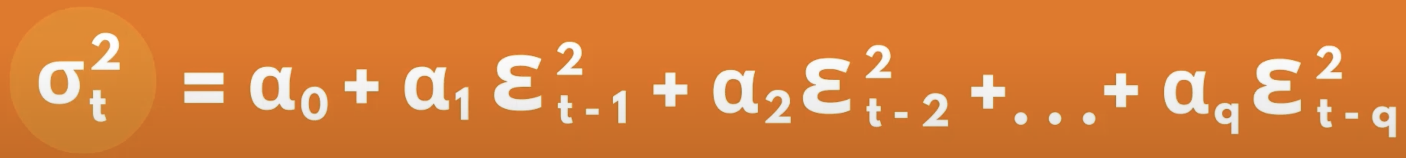
  
Great now that we've explained what the model looks like we're ready to understand what it measures.

hello again last time we mentioned the arch models consists of several equations including the mean equation and the variance  equation we already explained the latter so now we're going to explore in detail the entire structure of the model. This will help you understand why these kinds of models can sometimes take  more time to compute and how to choose the best fitting one. For starters it's important to note that we can express any variable rt that we plan on fitting into an arch model with the simple equation:

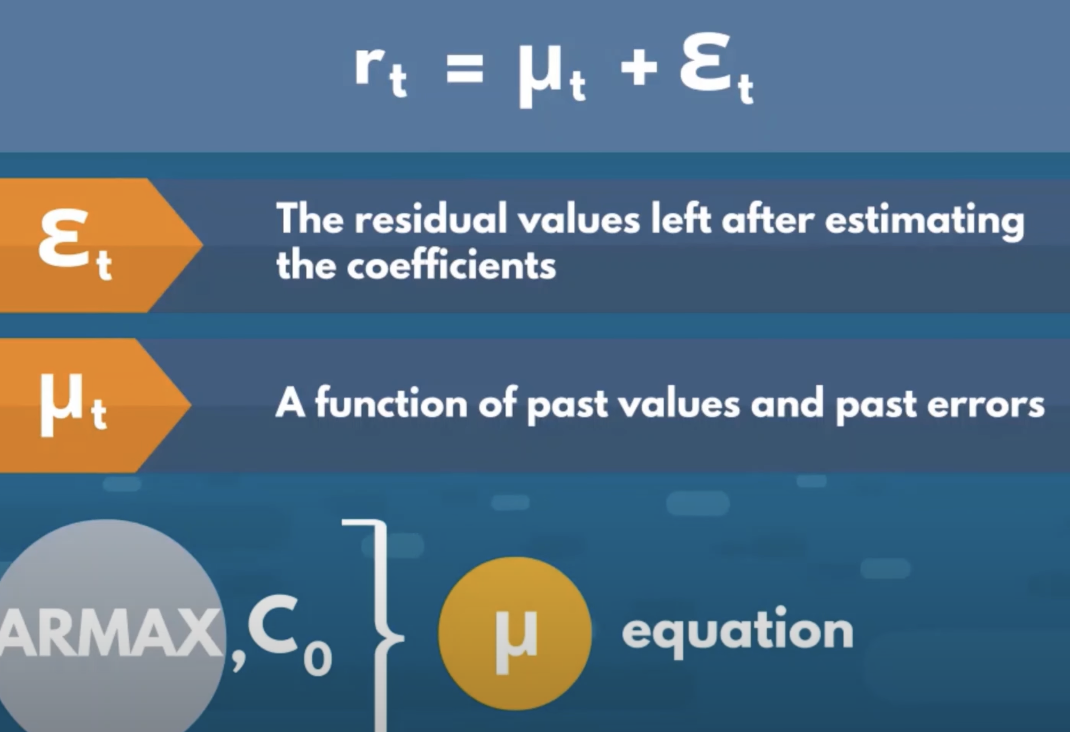

Here lies the clutch of this model, the mean is a time series as you can tell by the T index so it doesn't have to be 0 or any other fixed constant, it can actually be a function of past values and past errors. In other words the mean can be modeled using an ARMAX model. Of course whether the mean is measured via an ARMAX model or is a constant value depends entirely on the data set, hence the need to have the mean equation. 

We often assume the mean is serially uncorrelated, that is there is no time dependent pattern, however at times where one is certainly apparent we can adopt an ARMA arch model but how do 
we do that we simply use the ARMA aspect to model the variable and leave the arch component to deal with the variance caused by unexpected shocks. 

Fantastic, it's important to note that we might have a two equation or a three equation representation of each arch model:

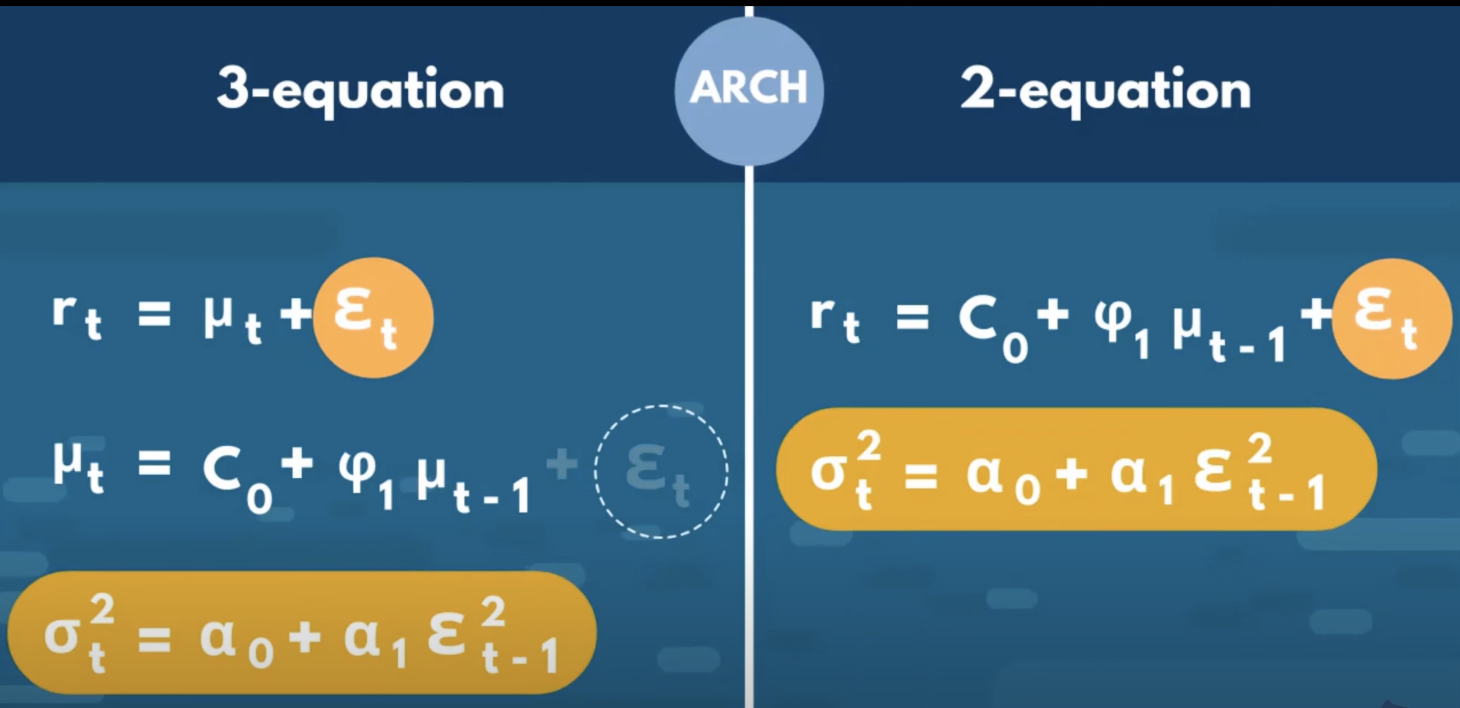

1) The  first model is represented by the three equations we showed. The general one where the value simply follows the return and observes some white noise, followed by the mean equation, and of course the variance equation. Interestingly enough the mean equation is a function here, which points out that there are no residuals to be included. That's because they're already included in the first equation of the model. 
2) The two equation representation is the one we're going to use here, in it we combine the first two equations by substituting muT  with whatever function its equivalent to. That way the mean equation is actually a model since it also includes residuals. 
The common theme in both representations is that the variance equation does not change. Hence the meat of the arch is consistent 
throughout. 

Another important point to explain is how the different equations interact to measure volatility. See the arch model first fits the mean equation to the data and estimates the residuals, then based on the epsilon values we extracted, it measures the conditional 
variance.

## Importing the relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [6]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [7]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

Previously we mentioned that there are no functions which suggest the optimal number of lags we should include for an ARMA or ARIMA 
method, however that isn't necessarily the case for ARCH models, well there isn't a single plot that achieves this, but we can examine the PACF of both the variable RT and RT squared, since we want to measure the volatility of returns will refer to this additional time series as squared returns. 
We've already computed and stored the returns in a column of the data set now let's do the same for their squared counterparts. The simplest way to do this would be to apply the mul method and multiply each element of the return series by itself. To make sure we've successfully created the squared returns we should display the two sets using the plot method. As you can see the periods of low positive and negative returns are expressed with low volatility while those with sharp jumps or drops have high uncertainty.

## Creating Returns

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

## Creating Squared Returns

In [9]:
df['sq_returns'] = df.returns.mul(df.returns)

## Returns vs Squared Returns

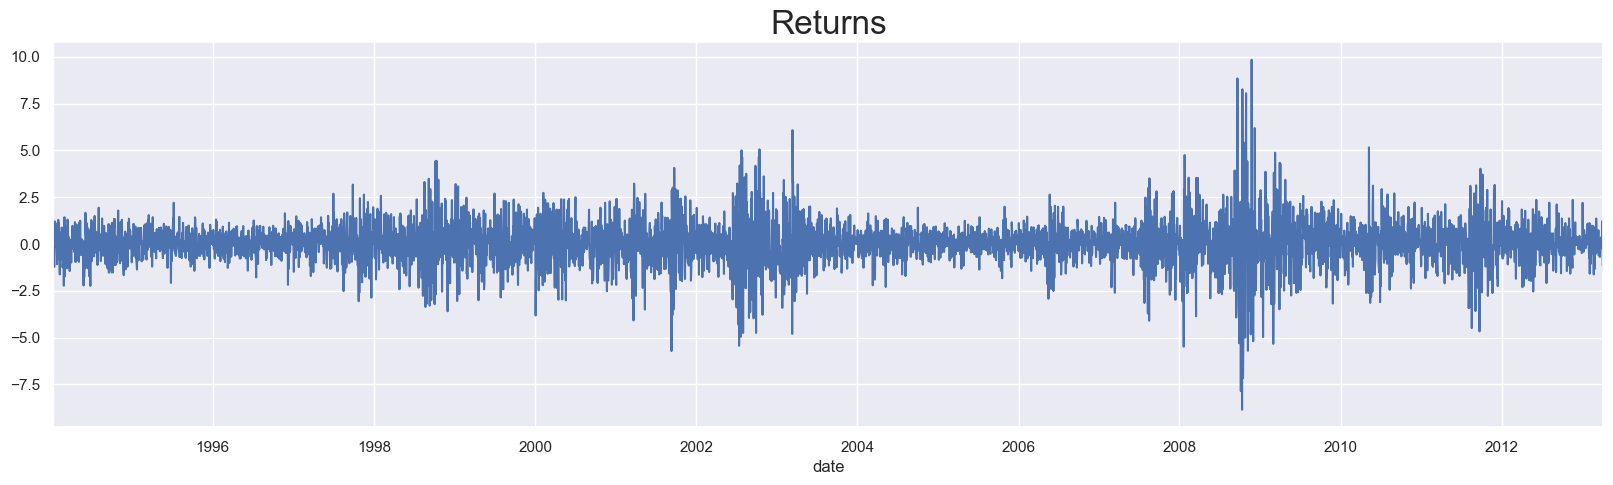

In [10]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

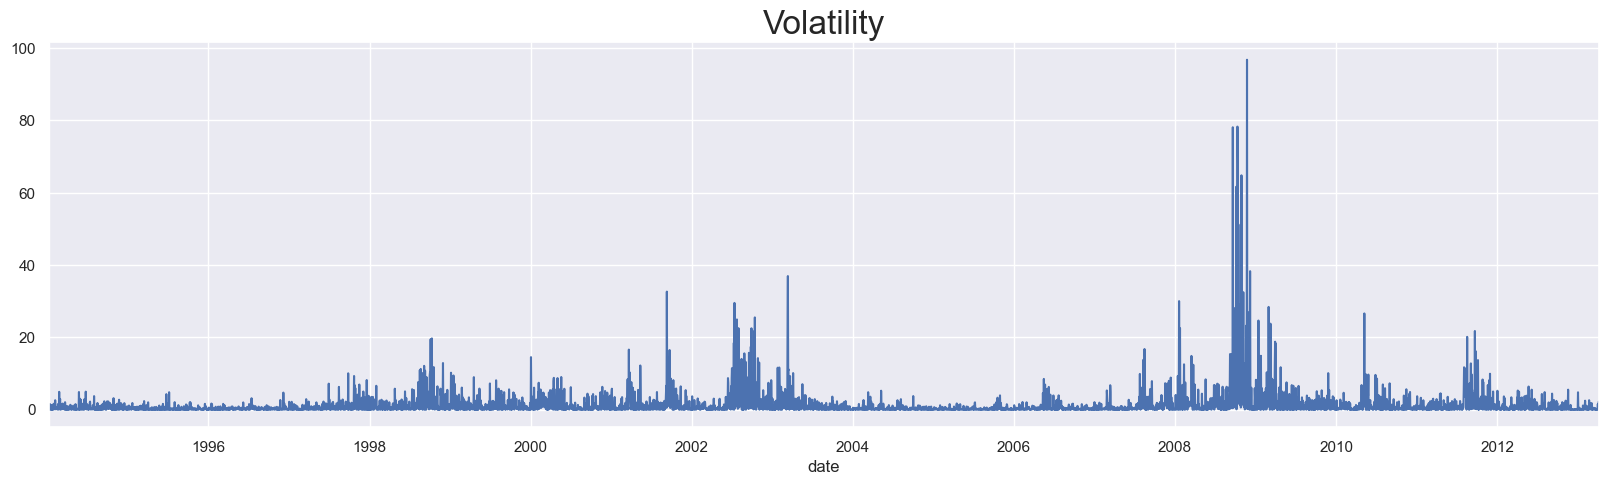

In [11]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

Next up we should look up the PACF of both returns and squared returns. When you pass the datasets as inputs for the method make sure you start from the second value of the data frame just in case you need a hint we do this because there are no returns for the first period. 

Generally the rule dictates that if the time series resembles white noise, while it's squared version suggests using an AR model, we should resort to using an arch to model variance  otherwise we might have to experiment a bit with different lag values until we find the model which captures the effects best. 

We've already seen the PACAF plot for returns where the first several lags were significant therefore as much as we want to we can't directly use the rule of thumb we just introduced. Regardless of that we should still have a look at the squared values to get an idea about which lags are significant. That way even though we aren't getting the suggested number of lags, we're still gaining valuable insight on how the data performs.

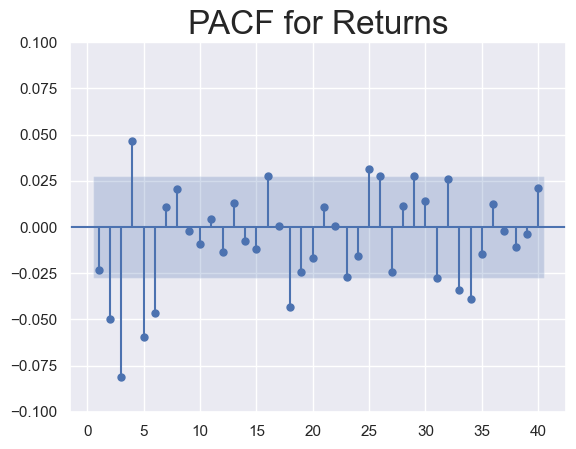

In [16]:
sgt.plot_pacf(df.returns[1:], zero = False, lags = 40)
plt.title("PACF for Returns", size = 24)
plt.ylim(-0.1,0.1)
plt.show()

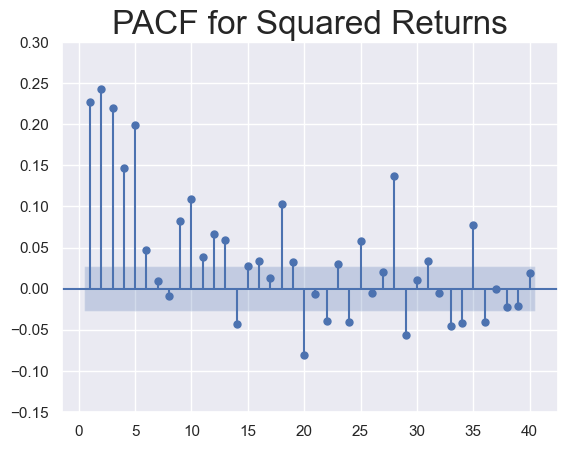

In [22]:
sgt.plot_pacf(df.sq_returns[1:], zero = False, lags = 40)
plt.title("PACF for Squared Returns", size = 24)
plt.ylim(-0.15,0.3)
plt.show()

We can see that the first six lags are significant with the first five yielding coefficients between 0.15 and 0.25. Such high significant values of partial autocorrelation among the first few lags, suggest that there tend to be short term trends in variance. 
Another way to think about this is clustering, where we have periods of high variation followed by periods of high variations as well as periods of low variation followed by periods of low variation. This is exactly what the volatility characteristics stated earlier so our data set makes perfect sense. 

We've now examined the specifics of the arch model so we're ready to fit an arch one model to our dataset. 

Last time we went through the notation behind the arch model and 
explained possible scenarios where it's appropriate to apply it in this lecture we're going to learn how to use the arch model method to fit an arch 1 model. 

To conduct any of this analysis we must first import the relevant libraries hence we write from arch import arch model this is the only new module we need to import for now.

Perfect the next steps we're about to take will feel very similar first we'll define a model and fit it to the dataset, once we're ready we'll display its table of summarized statistics.
Now that we have our plan set up let's get coding we start off by creating a variable which will save our model specifications of course we can use the convenient naming system we created early on and call the variable model arch 1. We must then set it equal to the outcome of the arch model method next we simply pass the time series we want to measure as the argument variable in this case we're talking about returns make sure to specify we're only using return values after the first element because its value isn't available it's extremely important to note that if we don't pass 
on any values to the other arguments we'll be using a type of model which is different from the arch we intended to 
use. Our goal right now is to learn how to read the summary table so let's fit this model without giving values to the other arguments and then print out its summary. 

## The arch_model() Method

In [24]:
from arch import arch_model

In [28]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712423623649
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478409483
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366189904
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Wed, Feb 14 2024   Df Residuals:                     5019
Time:                        12:16:32   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

Okay for the time being we're going to disregard the computational outputs of fitting this model and focus on the summary table we see the table as three parts so we're going to start with the top one labeled constant mean GARCH model results let's begin with the mean model box which states constant mean. This implies that the mean is constant rather than moving as our previous experience with returns suggested. Below we see the volatility model which is 
labeled as GARCH instead of arch this confirms that we are using a different type of model for the variance equation but we'll learn more about this later on. Next up we can notice normal written next to distributions this expresses the distribution of the residuals, the method dictates how we find the coefficients which is the maximum likelihood in this case. Let's look at the right 
side of the column the first five are all features we've seen in previous summary tables for regressions which include the log likelihood, information criteria, and the r-squared values, however the one aspect we really want to focus on is the DF model which shows the number of degrees of freedom this particular model has, in other words it showcases the number of coefficients were trying to estimate since we have four we expect to have the numeric approximations of four variables shown in the other parts of the table it's time to move to the mean model part of 
the table. What we see there is a single variable mu and its characteristics. This mu is the same as the one we had in our 
initial equation and since we saw this is a constant mean model we expect only a single constant coefficient to be determined for this equation. Furthermore the large T value suggests significance 
of the coefficient so we know the mean isn't zero. Finally the last part of the table is called the volatility model and it's 
what we're really interested in when we deal with arch let's start from the coefficient names the Omega represents the constant value in the variance, it's what we labeled as alpha null when we introduced the equation then we have alpha 1 which is obviously the coefficient for the squared values right. Under it we have beta 1 although we're unfamiliar with it at the moment in less than 30 minutes we'll know exactly what it represents.

Okay now  let's go back and examine the iteration output since this model has so many moving parts it takes several iterations 
before it converges. This of course is due to fitting two equations at the same time, but how does it work? It fits a model with certain coefficients then checks how well it is performed, afterwards it adjusts the coefficients before making a secondary check and so on.  Generally the program stops when the log likelihood decreases, however in this case the log-likelihood 
is negative this means the absolute values have to increase so that the program can stop. Furthermore since values can be extremely close there can be some discrepancies depending on the 
way the functions are coded luckily this feature is automatically programmed in the method itself, so we don't need to worry about when to stop. For more complicated models this process could take numerous attempts, to avoid needlessly seeing the results for every single iteration we can set the frequency of the updates, we do this by adjusting the value for the update frequency argument to a higher number like five or ten. Of course if you prefer to observe all iteration results you can leave the frequency to one. 

Now that we know how to interpret the results let's talk about the correct argument values we need to set to get a simple arch model. 

Let's start with the mean equation, this model assumes that the mean of the series is not serially correlated in other words the mean equation is time-invariant so it includes neither past values nor past residuals. Therefore we should use either the default 
constant mean or the more specific zero. Since we don't know whether the mean of the time series is indeed zero we should just stay with the constant mean approach. 

Next on the agenda we have one of the most important alterations we need to make and that's setting the volatility model equal to arch, we achieve this by setting **vol = "ARCH"**. However we also need to specify the order of the model which is done by giving a value to the P argument, this can be slightly confusing since we established that the usual order of the arch is defined as Q, however since the AR order coefficient for the ARMA model was called P we can remember the notation from there. Fortunately the arch model method is equipped to handle surplus defined arguments in other words even if we pass values to the lags or q arguments here they will be ignored because of the mean and variance models 
we specified earlier. 

Good, we have everything set up so we're ready to fit the model and print out the summary statistics. 

# The Simple ARCH(1)

In [52]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782041057
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782041057
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Wed, Feb 14 2024   Df Residuals:                     5019
Time:                        13:01:26   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.854e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

We see that it took this model only six iterations to execute, this means the specifications were loose enough and Python managed to solve the regression in only six tries. This implies our model is light and doesn't take too long to compute. Next we can have a look at the first third of the summary table: once again we 
see the name of the model and this time it is exactly what we wanted a **constant mean arch model**, if we have a look at the 
right column we'll see both the adjusted and unadjusted r-squared values both are zero (that means the value is so very minut that we should round it down to zero even up to the third digit after 
the decimal point, second of all we know that the R squared is a measurement of explanatory variation away from the mean so if we're assuming a constant mean it makes little sense to expect this model to explain that deviation. Well in other words if the residuals are simply a version of the original data set where every value is decreased by a constant then there will be no actual variance, hence there is nothing to explain and that results in a zero r-squared value, as a takeaway we must remember that the R squared is a useful measure but not for arch models) 
moving on we can see that the log-likelihood is roughly negative 7660 if you compare this to the values we got for the arma and ARIMA you'll see that the arch value is higher than most, of course we know that the log-likelihood measures the goodness of fit therefore **even the simplest arch model yields a better estimate than the complex multi lag ARIMA models we referred to earlier**. This is fantastic news because it means the higher complexity which we injected by estimating two equations simultaneously is immediately paying off by increasing the log likelihood of the model. 

Okay now let's have a look at the coefficients from the degrees of freedom: in the first table we know that there should be three of them based on how we specified our model these three should be the constant from the mean as well as alpha null and alpha one from  the variance equation. A quick glance is enough to see this is precisely what we get in the summary table. Now let's have a closer look at the results, we'll start with the mean model section first, we notice that the MU coefficient is significant 
therefore the coefficient value is the baseline we use to determine the residuals for the variance equation. Now let's head toward the volatility model which we already established is the meat of the arch model we see that both Omega and alpha 1 are significant of course Omega here represents the constant term  of the variance equation which we dubbed as alpha null but why is it dubbed differently then. Well an extension of the arch model includes another series of variables and its associated  coefficients to avoid confusing the constant as part  of the arch coefficients the Python method we are using adopts a completely 
unambiguous notation Omega. Great so we are estimating only three coefficients and all three turn out to be significant, additionally the log likelihood is higher than that of any of the ARIMAX family we showed so the arch one instantly becomes the best estimator of the data we've seen so far. 

**However it is crucial to remember that the arch can only be used to predict future variants rather than future returns thus we can 
use it to determine if we expect to see stability in the market but not predict if the prices would go up or down**. Since the arch method has many arguments, for homework try setting different 
specifications to the arch 1 and comment on how they would affect the log likelihood. I suggest you switch up the mean model to 0 or even AR since we found some time discrepancies in the data when using ARMA models just make sure you leave the volatility argument vol equal to arch if you decide to go for an autoregressive mean model make sure you specify the lags you intend to use by passing a value to the lags argument you can input an array like 2 3 & 6 as the lags if you believe that some of those in-between might be 
insignificant in addition practice setting different probability distributions for the error terms. I recommend checking the students t and generalized error distributions by setting dist equal to t or GED respectively now just as with the ARMA family of models we should see how increasing the arch order affects  estimations and that's exactly what we'll do in the next lecture 

In [30]:
model_arch_1 = arch_model(df.returns[1:], mean = "Zero", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     20,   Neg. LLF: 7662.934731760544
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7662.934731760531
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7662.93
Distribution:                  Normal   AIC:                           15329.9
Method:            Maximum Likelihood   BIC:                           15342.9
                                        No. Observations:                 5020
Date:                Wed, Feb 14 2024   Df Residuals:                     5020
Time:                        12:49:52   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9244  4.332e-02     21.340 4.808e-101 [  0.839,  1.009]
alpha[1]       0.3640  4.945e-02      7.361  1.825e-13 [  0.267,  0.461]
========================================================================

Covariance estimator: robust
"""

In [50]:
model_arch_1 = arch_model(df.returns[1:], mean = "AR", lags = 2, vol = "ARCH", p = 1, dist = 'ged')
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 7493.1496919185065
Iteration:     10,   Func. Count:     88,   Neg. LLF: 7336.5888797147745
Iteration:     15,   Func. Count:    125,   Neg. LLF: 7328.658517087422
Iteration:     20,   Func. Count:    165,   Neg. LLF: 7328.658435316975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7328.658434980169
            Iterations: 21
            Function evaluations: 173
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - ARCH Model Results                                  
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.002
Mean Model:                                    AR   Adj. R-squared:                  0.002
Vol Model:                                   ARCH   Log-Likelihood:               -7328.66
Distribution:      Generalized Error Distribution   AIC:                           14669.3
Method:                        Maximum Likelihood   BIC:                           14708.4
                                                    No. Observations:                 5018
Date:                            Wed, Feb 14 2024   Df Residuals:                     5015
Time:                                    12:54:09   Df Model:                            3
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0348  1.407e-03     24.761 2.370e-135   [3.208e-02,3.759e-02]
returns[1]    -0.0114  1.781e-03     -6.412  1.439e-10 [-1.491e-02,-7.930e-03]
returns[2]    -0.0303  1.335e-03    -22.719 2.896e-114 [-3.296e-02,-2.772e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9228  3.762e-02     24.527 7.618e-133 [  0.849,  0.997]
alpha[1]       0.3423  3.872e-02      8.840  9.562e-19 [  0.266,  0.418]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0594  3.184e-02     33.279 7.771e-243 [  0.997,  1.122]
========================================================================

Covariance estimator: robust
"""

## Higher Lag ARCH Models

Last time we saw how the simple arch model measures the volatility of returns this time we're going to see the effect of increasing 
the order of the conditional variance let's get our hands dirty with some coding. Since we start where we left off last time we're simply going to change the value for the argument P from 1 to 2 this is how we define an ARCH(2) model, so we expect to get similar results. although we'll stick to the same argument values as before, I highly encourage you to go a step further and see how the simplest of models compared to the ar arch ones that you found. 
For the sake of consistency we can change the name of the model and results variables to account for this increase in order therefore they would be called model arch two and results arch two 
respectively. 

In [53]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.009141231838
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.5451640981455
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Wed, Feb 14 2024   Df Residuals:                     5019
Time:                        13:01:55   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

In [54]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 7496.407337070774
Iteration:     10,   Func. Count:     75,   Neg. LLF: 7277.050452148325
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7277.050452148325
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Wed, Feb 14 2024   Df Residuals:                     5019
Time:                        13:04:35   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.316e-02      4.018  5.875e-05 [2.707e-02,7.865e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5012  2.834e-02     17.685  5.504e-70 [  0.446,  0.557]
alpha[1]       0.1570  2.649e-02      5.926  3.108e-09 [  0.105,  0.209]
alpha[2]       0.2197  2.588e-02      8.489  2.077e-17 [  0.169,  0.270]
alpha[3]       0.2804  3.354e-02      8.359  6.302e-17 [  0.215,  0.346]
========================================================================

Covariance estimator: robust
"""

You can notice how the number of iterations necessary for the progress to compute increases from 6 to 9 that's because we're estimating an additional coefficient here, the one for the squared 
residuals two periods ago. Next we can compare the summary tables 
quickly and see how the log-likelihood is increased while the information criteria have gone down, these both suggests that the arch 2 outperforms the arch 1. However we still haven't checked 
the coefficients, but judging by their p-values they're all significant, this is another measurement which works in favor of the arch 2, so increasing the order resulted in a better model. We can repeat this same action and compute the values for the arch three, if we do so we'll see that the log likelihood keeps increasing but by a smaller number, the AIC also keeps decreasing marginally while the coefficients all remain significant since this is mostly a trial and error process you could try this on your own as an exercise and see for yourself that this pattern persists until the thirteenth lag where one of the coefficients alpha 9 is no longer significant.

Of course including more and  more values reduces the additional 
effects each one has on the log-likelihood in a sense we are dealing with diminishing marginal log likelihood with each additional lag, in other words the more past squared residuals we take into account the less important each additional one becomes 
now this somewhat resembles the case we had with MA models where we just included more and more lags until we started getting non significant coefficients, well we amended that case by also including past values as an independent variable but can we do so here the answer is yes and we're going to find  out why in the next lesson. 

Last time we mentioned improving arch models by including past values as well, but what exactly would these past values be.  Including past returns wouldn't make much sense since we usually account for those in the mean equation. If we want to draw a parallel with the ARMA we should include some AR equivalent components. As in the AR models will count on past conditional variances to help us explain current conditional variances. on 
one hand this sounds slightly confusing but on the other it makes total sense due to the nature of variance clustering. Since periods of high volatility are followed by periods of high volatility and periods of low volatility are followed by such with low volatility, adding past conditional variances should serve as a great benchmark for estimations. Now a past conditional variance would already include in itself the effects of previous squared 
residuals this would make adding more previous squared residuals redundant that's why such a model is called the generalized autoregressive conditional heteroscedasticity model or simply GARCH next we'll talk more about its equation its parallels to the ARMA as well as how it improves the arch predictions.

# GARCH Model
In this section we're going to talk about the generalized arch model or simply the GARCH model. To explore it thoroughly we're going to discuss:

1) the intuition behind it 
2) introduce the mathematical notation
3) try fitting it to the data 
 
GARCH model  is an extension of the arch where we add past conditional variances to the variance equatio. The intuition behind this comes from observations of volatility clustering where you can notice **patterns of consecutive periods of low and high volatility in the returns plot**. Therefore if we include the conditional variance from last period we'll have a sort of benchmark on what to expect. Of course this wasn't always true for returns since they could jump and drop from one period to the next, while **volatility is continuous and doesn't behave like that**. Now that we've grasped the intuition behind the model let's continue with the equation for the volatility model, notice that we use volatility model and variance model interchangeably this is due to the fact that variance is our measure of volatility so the two are equivalent in this context. 

Suppose we have a variable Y and we want to apply the simple GARCH model on. Then the equation will read as follows: 

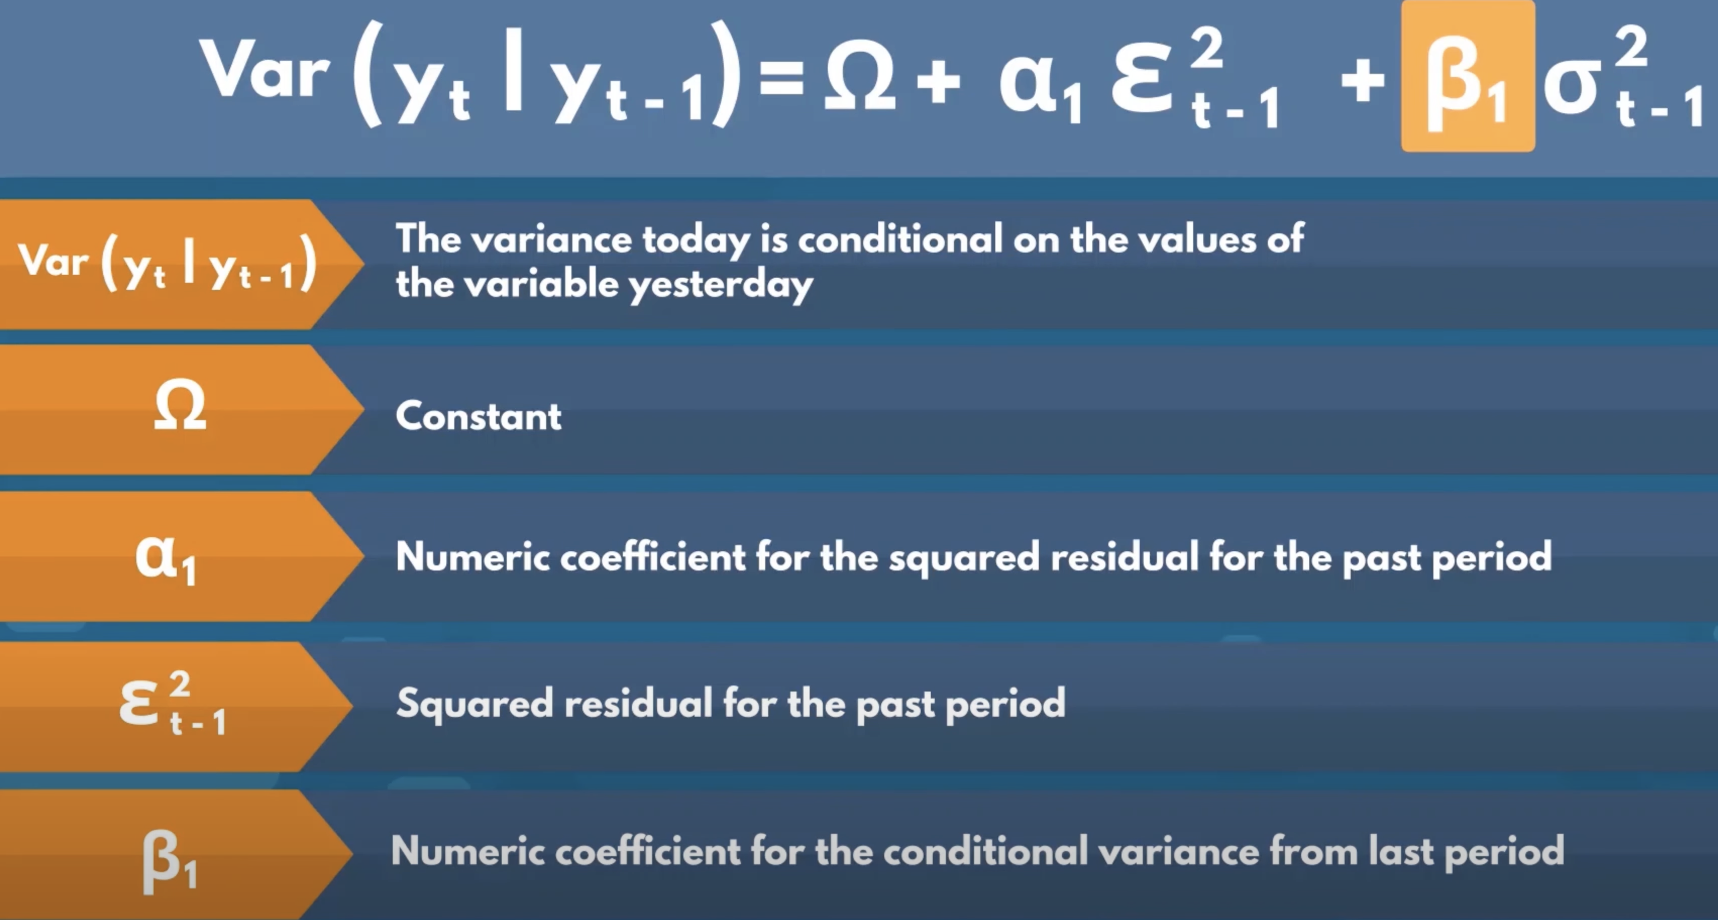

Last time we said our goodbyes after mentioning the similarities between this new GARCH model and our familiar ARMA in this lecture we're going to talk a bit more about this and draw several parallels to help you comprehend the idea behind the GARCH better. Let's start with number of orders, the simple GARCH model has two orders an ARCH ORDER and a GARCH ORDER, the former represents the number of past squared residuals while the latter the number of past conditional variances, therefore the equation we witnessed is the volatility equation for the simple GARCH(1,1). Of course the ARMA model also contains two orders one for the past values and one for past residuals. 
Since we're measuring conditional variance with the GARCH, the GARCH components is essentially an AR component moreover the ARCH component takes square residuals while the MA expressed past errors, so the former is just a squared version of the latter and since variance is squared measurement, the two are essentially equivalent. 

Next up look at the order of notation. We have the ARMA PQ and the GARCH PQ in both the P expresses some form of past values while Q expresses some form of error terms, in a way the GARCH is a sort of squared ARMA model for the error terms of the main equation. However there are also complex ARMA GARCH models which combine the two. When it comes to such models we use an ARMA PQ for the mean equation and a GARCH PQ for the volatility equation. It's important to note that the p and q orders of the two don't necessarily have to match. For instance we can have a single garch component in the variance equation while using three AR aspects in the mean expression. This distinction is important because it gives us great flexibility when choosing the best model to describe our dataset. Now that these parallels are clear we're ready to fit a GARCH(1,1) with serially uncorrelated mean. In case you're wondering what that is it's just the formal way of stating that **the mean model doesn't rely on past values or errors** essentially this is just a **constant mean model** now that this is clear let's get coding.

We don't need to import any new packages here the same method we used for the arch will suffice in fitting a GARCH model so there's no need for a new library. In case any of you need a refresher the library was called arch and the method arch_model so if we want to fit a GARCH(1,1) with serially uncorrelated mean we simply need to call the above-mentioned method and use the appropriate time series as an argument. That's because the default values for most of the arguments are exactly what we want them to be. The mean model is set to be constant, the volatility model is set at GARCH and the orders p and q are set to 1. Next on our list we simply need to check the summarized statistics of the model and we're ready to comment on the coefficients. 

## The Simple GARCH Model

In [55]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712423623649
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478409483
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366189904
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Thu, Feb 15 2024   Df Residuals:                     5019
Time:                        10:08:08   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

For starters we see that this model took thirteen iterations to converge, this is more than twice the number of computations it took for the simple arch to do the same, which was six. However if we check out the log-likelihood value we see that it is even greater than the one we reached for the arch 12 this suggests that adding a single past variance gives more predictive power than eleven squared residuals. I know such a comparison sounds like an advertisement for some dishwashing liquid or laundry detergent but we noticed a similar pattern when going from the MA to the ARMA that said including past values as a form of baseline provides much greater accuracy which also explains the higher likelihood of our predictions. Now since all the coefficients are significant and we get a higher log likelihood this model instantly becomes our frontrunner for measuring volatility for the time being. We say for the time being because we're yet to see how higher-order GARCH models perform. 

Last time we examined how the GARCH(1,1) performs in measuring the volatility among price returns. In this lecture we're going to focus on higher level GARCH PQ models. Okay before we begin we want you to know it's been mathematically proven that no higher-order GARCH models will outperform the GARCH(1,1) when it comes to variance of market returns. This is due to the recursive nature in which the past conditional variances are computed. Including one not only makes it redundant to include past squared residuals, since it already captures the effect, but also makes other conditional variances obsolete. From a mathematical point of view all the effects of the conditional variance two days ago would be contained in the conditional variance yesterday so there would be no need to include more than one GARCH component. The precise algebra behind this proof falls outside of the scope of this course however keep in mind that all you need to know is that including all higher-order GARCH models is not necessary anyway, it's always best to question what you are told so let's quickly test a few of these models empirically. 

Before we begin we need to draw your attention to a potential pitfall of the arch model method. In it the p and q notation for the order arguments is flipped in other words **P represents the arch order and Q the garch order** one explanation for this is because when we write out the GARCH equation, the arch components usually come before the GARCH once, in short if we want to fit a GARCH PQ model we set the p argument equal to q and vice versa of course it doesn't really make a difference when it comes to analyzing returns since the GARCH(1,1) is the optimal choice, however if you're examining other types of time series remember to take this predicament into account. 

When you use the arch model method we've learned what we needed to know so let's fit the GARCH(1,2), the only adjustment we should make is to set the q argument to 2 then we can jump directly to the volatility model of the summarized table to see something extremely interesting. 

## Higher-Lag GARCH Models

In [56]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 6974.175070184585
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6970.058392785186
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366227395
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13950.1
Method:            Maximum Likelihood   BIC:                           13982.7
                                        No. Observations:                 5020
Date:                Thu, Feb 15 2024   Df Residuals:                     5019
Time:                        10:41:52   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.184e-02      3.938  8.219e-05 [2.341e-02,6.982e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.908e-03      3.761  1.696e-04 [5.236e-03,1.663e-02]
alpha[1]       0.0835  1.189e-02      7.019  2.231e-12   [6.017e-02,  0.107]
beta[1]        0.9089      0.188      4.845  1.268e-06     [  0.541,  1.277]
beta[2]        0.0000      0.180      0.000      1.000     [ -0.352,  0.352]
============================================================================

Covariance estimator: robust
"""

We observe a p-value of 1 for the beta 2 coefficient this means we have a case of full multicollinearity due to the relationship between conditional variances which we explained earlier. We can try the GARCH(1,3) but we are bound to get the exact same p-value for both beta 2 and now beta 3 as well. This is all truly fascinating but let's see how the GARCH(2,1) performs.

In [61]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 8793.711923408657
Iteration:     10,   Func. Count:     76,   Neg. LLF: 6967.731247473179
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6967.731020076106
            Iterations: 12
            Function evaluations: 87
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6967.73
Distribution:                  Normal   AIC:                           13945.5
Method:            Maximum Likelihood   BIC:                           13978.1
                                        No. Observations:                 5020
Date:                Thu, Feb 15 2024   Df Residuals:                     5019
Time:                        10:48:02   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.187e-02      3.922  8.780e-05 [2.329e-02,6.982e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0129  4.097e-03      3.158  1.589e-03  [4.908e-03,2.097e-02]
alpha[1]       0.0547  1.665e-02      3.286  1.017e-03  [2.208e-02,8.735e-02]
alpha[2]       0.0389  2.345e-02      1.659  9.709e-02 [-7.056e-03,8.488e-02]
beta[1]        0.8974  1.712e-02     52.415      0.000      [  0.864,  0.931]
=============================================================================

Covariance estimator: robust
"""

Even though we don't get a p-value of one we can still see the additional coefficient is not significantly different from zero at the 5% significance level, therefore we should avoid using this method.   

Up until now we've seen how to conduct time series analysis manually because this is how much of the empirical analysis in the field is conducted, but what if we could skip all of that, what if we could run some code and get the best model instantly without having to compare a ICs and log likelihoods that would save us a huge amount of time and allow us to be more precise in our analysis, on the one hand having such a tool at our disposal would eliminate a big chunk of the time needed to go through different models one by one, on the other we won't be able to peek behind the curtains and understand our data really well. Finally it should be noted that borderline cases would be treated in a standardization fashion essentially neglecting our domain expertise. in the next section we'll see how to automate the model selection process and we'll discuss the pros and cons that go along with such approaches. 